In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt

$$ TPR = \frac{TP}{FN + TP}$$

$$ FPR = \frac{FP}{TN + FP}$$

In [24]:
X, y = make_classification(n_samples=150, n_classes=2, random_state=1)



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

log_regression = LogisticRegression()


log_regression.fit(X_train,y_train)

LogisticRegression()

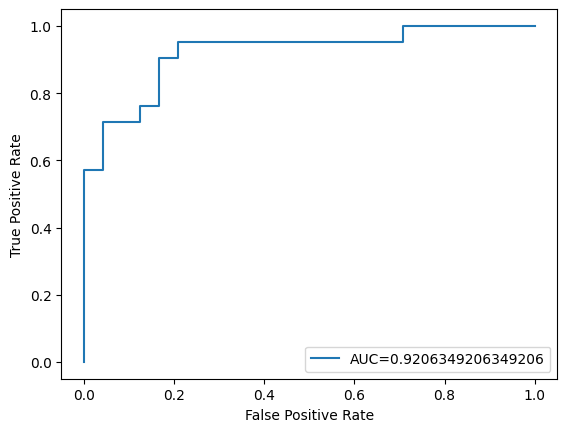

In [25]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

$$precision = \frac{TP}{TP + FP}$$


$$recall = \frac{TP}{TP + FN}$$

In [26]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba)

auc = metrics.auc(recall, precision)


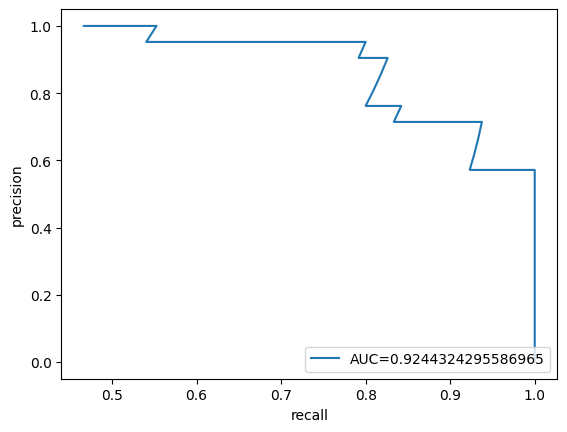

In [27]:
plt.plot(precision,recall, label="AUC="+str(auc))
plt.ylabel('precision')
plt.xlabel('recall')
plt.legend(loc=4)
plt.show()

$$TP = \rho x$$
$$FP = \rho (1 - x)$$
$$FN = (1- \rho) x$$
$$TN = (1 - \rho)(1 - x)$$

$$ TPR = \frac{\rho}{\rho + 1 - \rho} = \rho$$


$$ FPR = \frac{\rho(1- x)}{(1 - \rho) + \rho(1 - x)} = \rho$$

$$ \int_{0}^{1} \rho d\rho  = \frac{1}{2}$$

In [8]:
import roc
from functools import reduce


In [14]:
X, y = make_classification(n_samples=1500, n_classes=2, random_state=1)



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

log_regression = LogisticRegression()


log_regression.fit(X_train,y_train)

LogisticRegression()

In [15]:
probe_predicts = log_regression.predict_proba(X_test)
predicts = log_regression.predict(X_test) 
probe_predicts[:, 1] = y_test  
probe_predicts = sorted(probe_predicts, key=lambda x: -x[0])

In [16]:
zeros = reduce(lambda x, y: (x + 1) if y[1] == 0 else x, probe_predicts, 0)
ones = reduce(lambda x, y: (x + 1) if y[1] == 1 else x, probe_predicts, 0)
print("Zeros: " + str(zeros))
print("Ones: " + str(ones))

Zeros: 241
Ones: 209


Area ROC = 0.95


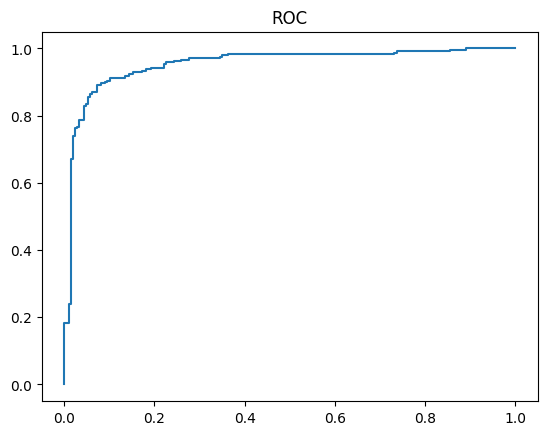

Area PR = 0.96


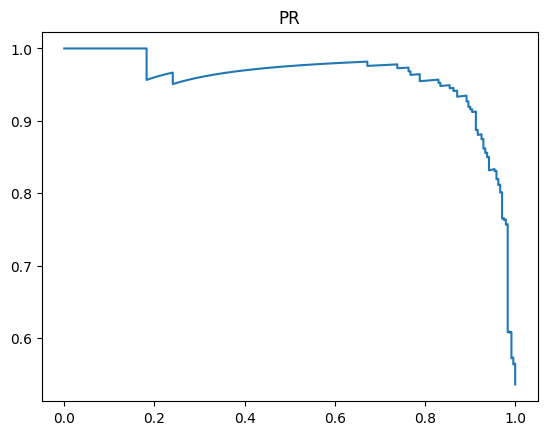

In [17]:
roc.ROC(probe_predicts)
roc.PR(probe_predicts)